# CODING

## Table of Content
### 1. Setup
### 2. Data Summary
#### 2.1 First and last rows
#### 2.2 Data Type, Size, Missing Values and Duplicates
### 3. Feature Analysis
### 4. Change of feature representation
### 5. Processing missing values
### 6. Influence of factors on Survival

## 1. Setup

In [88]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
# Settings
sns.set_style('whitegrid')
# Make static images plots embedded in the notebook
%matplotlib inline

In [90]:
# Get the Data and create the data frame
path = './Data/'
filename = 'titanic-data.csv'
titanic = pd.read_csv(path+filename)

## 2. Data Summary

### 2.1 First Rows and Last Rows

In [91]:
titanic.head(n=20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [92]:
titanic.tail(n=20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


In [93]:
# Summary of numerical data
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 2.2 Data type, size, missing and duplicated values

In [94]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [95]:
# size of the data frame
titanic.shape

(891, 12)

In [96]:
# culumn names
titanic.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [97]:
# NaN values in data frame
print "Percentage of NaN values for Cabin feature: " + \
    repr(titanic.Cabin.isnull().sum()*100.0/titanic.shape[0])
print "Percentage of NaN values for Age feature: " + \
    repr(titanic.Age.isnull().sum()*100.0/titanic.shape[0])
print "Percentage of NaN values for Embarked feature: " + \
    repr(titanic.Embarked.isnull().sum()*100.0/titanic.shape[0])

Percentage of NaN values for Cabin feature: 77.104377104377107
Percentage of NaN values for Age feature: 19.865319865319865
Percentage of NaN values for Embarked feature: 0.22446689113355781


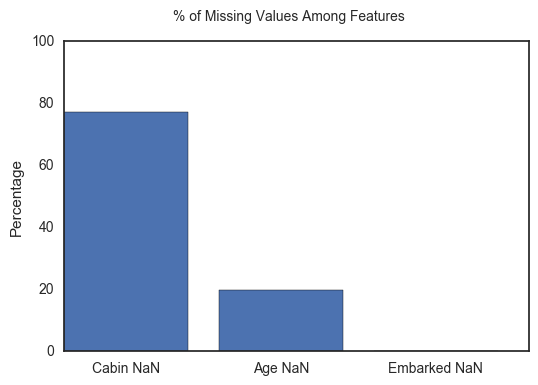

In [98]:
plt.style.use('seaborn-white')

labels = ['Cabin NaN', 'Age NaN', 'Embarked NaN']
x_pos = np.arange(len(labels))
width = 0.8
Cabin_NaN = titanic.Cabin.isnull().sum()*100.0/titanic.shape[0]
Age_NaN = titanic.Age.isnull().sum()*100.0/titanic.shape[0]
Embarked_NaN = titanic.Embarked.isnull().sum()*100.0/titanic.shape[0]
vals = (Cabin_NaN,Age_NaN,Embarked_NaN)

#fig = plt.figure()
plt.bar(x_pos,vals)
plt.suptitle('% of Missing Values Among Features')
plt.xticks(x_pos)
plt.xticks(x_pos+width/2.0, labels)
plt.ylabel('Percentage')
axes = plt.gca()
axes.set_ylim([0,100])
plt.savefig('MissingDataAmongFeatures.png')
plt.show()

In [99]:
# Is there any missing and duplicate value for Name feature? 
print "# unique values: ",len(titanic['Name'].unique())
print "# null values:",titanic['Name'].isnull().sum()

# unique values:  891
# null values: 0


In [100]:
# Is there any missing and duplicate value for Ticket feature? 
print "# unique values: ",len(titanic['Ticket'].unique())
print "# null values:",titanic['Ticket'].isnull().sum()
print "# duplicates: ", len(titanic.set_index('Ticket').index.get_duplicates())

# unique values:  681
# null values: 0
# duplicates:  134


In [101]:
print "duplicates are:"
titanic.set_index('Ticket').index.get_duplicates()

duplicates are:


['110152',
 '110413',
 '110465',
 '111361',
 '113505',
 '113572',
 '113760',
 '113776',
 '113781',
 '113789',
 '113798',
 '113803',
 '113806',
 '11668',
 '11751',
 '11767',
 '11967',
 '12749',
 '13502',
 '13507',
 '1601',
 '16966',
 '17421',
 '17453',
 '17474',
 '19877',
 '19928',
 '19943',
 '19950',
 '19996',
 '220845',
 '230080',
 '230136',
 '230433',
 '231919',
 '237736',
 '239853',
 '239865',
 '24160',
 '243847',
 '244252',
 '244367',
 '248727',
 '248738',
 '250644',
 '250647',
 '250649',
 '250655',
 '2627',
 '26360',
 '2651',
 '2653',
 '2659',
 '2661',
 '2665',
 '2666',
 '2668',
 '2678',
 '2691',
 '2699',
 '28403',
 '2908',
 '29106',
 '29750',
 '3101278',
 '3101295',
 '31027',
 '345764',
 '345773',
 '347054',
 '347077',
 '347080',
 '347082',
 '347088',
 '347742',
 '349237',
 '349909',
 '35273',
 '35281',
 '358585',
 '363291',
 '364516',
 '364849',
 '367226',
 '367230',
 '36928',
 '36947',
 '36973',
 '370129',
 '370365',
 '371110',
 '376564',
 '382652',
 '392096',
 '4133',
 '54636'

In [102]:
## Is there any missing and duplicate value for Cabin feature? 
print "# of unique values: ",len(titanic['Cabin'].unique())
print "# nb of null values:",titanic['Cabin'].isnull().sum()
# how to deal with Cabin Feature missing values?
# option 1: set to zero/default -> No
# option 2: mean : does not make sense for an ordinal feature
# option 3: ignore in computation: YES
print "# nb of duplicates: ", len(titanic.set_index('Cabin').index.get_duplicates())

# of unique values:  148
# nb of null values: 687
# nb of duplicates:  47


In [103]:
print "duplicates are:"
titanic.set_index('Cabin').index.get_duplicates()

duplicates are:


[nan,
 'B18',
 'B20',
 'B22',
 'B28',
 'B35',
 'B49',
 'B5',
 'B51 B53 B55',
 'B57 B59 B63 B66',
 'B58 B60',
 'B77',
 'B96 B98',
 'C123',
 'C124',
 'C125',
 'C126',
 'C2',
 'C22 C26',
 'C23 C25 C27',
 'C52',
 'C65',
 'C68',
 'C78',
 'C83',
 'C92',
 'C93',
 'D',
 'D17',
 'D20',
 'D26',
 'D33',
 'D35',
 'D36',
 'E101',
 'E121',
 'E24',
 'E25',
 'E33',
 'E44',
 'E67',
 'E8',
 'F G73',
 'F2',
 'F33',
 'F4',
 'G6']

In [104]:
# Is there any missing and duplicate value for Embarked feature? 
print "# unique values: ",len(titanic['Embarked'].unique())
print "# null values:",titanic['Embarked'].isnull().sum()
# how to deal:
# option 1: set to most frequent -> YES
# option 2: discard value or observation
print "# duplicates: ", len(titanic.set_index('Embarked').index.get_duplicates())
print "duplicates are:"
titanic.set_index('Embarked').index.get_duplicates()

# unique values:  4
# null values: 2
# duplicates:  4
duplicates are:


[nan, 'C', 'Q', 'S']

In [105]:
# Analysis with Group by Embarked
grouped_data = titanic.groupby('Embarked')
# where most people embarked?
print grouped_data.count()['Name']
# conclusion:  at Southampton
# which are the two empty values
print titanic[titanic.Embarked.isnull()]

Embarked
C    168
Q     77
S    644
Name: Name, dtype: int64
     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  


### Processing missing values for Embarked feature

In [106]:
# where most people embarked?
grouped_data = titanic.groupby('Embarked')
print grouped_data.count()['Name']

Embarked
C    168
Q     77
S    644
Name: Name, dtype: int64


In [107]:
# Processing missing values: replace with the most frequent value
titanic.loc[829,'Embarked'] = 'S'
titanic.loc[61,'Embarked'] = 'S'

In [108]:
# Is there any missing value for Age feature?
# how to deal: 
# option 1: set to zero -> NO
# option 2: set mean 
# from the overall population -> NO
# from groups: embarked, sex, parch, SibSp, Survived -> YES
# option 3: discard values or observation -> NO
# this feature is continuous: no need to look for unique values and duplicates
print "# null values:",titanic['Age'].isnull().sum()

# null values: 177


## 3. Feature Analysis
Number of passengers: 891

We have 12 features which are either continuous or categorical. 

The dependant feature is 'Survived' and the rest are independant variables.

Categorical features could be split into two sub-types: 

ordinal feature or nominal.

<b>Continuous features are:</b>
 
'Age'

'Fare'

<b>Categorical feature:</b>

'PassengerId', Ordinal feature

'Pclass', Ordinal feature

'SibSp', Ordinal feature

'Parch', Ordinal feature

'Name', Nominal feature (Textual feature)

'Sex', Nominal feature

'Ticket', Nominal feature (Textual feature)

'Cabin', Nominal

'Embarked', Nominal

## 4. Change feature representation

In [109]:
# Create new feature: Title
import string
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if string.find(big_string, substring) != -1:
            return substring
    print big_string
    return np.nan

title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                    'Don', 'Jonkheer']

titanic['Title']=titanic['Name'].map(lambda x: substrings_in_string(x, title_list))
 
#replacing all titles with mr, mrs, miss, master
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title
    
titanic['Title']=titanic.apply(replace_titles, axis=1)

In [110]:
# Change feature representation 
titanic = pd.get_dummies(titanic,columns=['Embarked'])
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Mr,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Mrs,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Miss,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Mrs,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Mr,0,0,1


## Process missing values for Age

In [111]:
# Replace missing values for Age with the median value of the group split by title
df = titanic.groupby('Title')
df_fillna = df.Age.median()
print df_fillna

Title
Master     3.5
Miss      21.0
Mr        30.0
Mrs       35.0
Name: Age, dtype: float64


In [112]:
for idx in titanic[titanic.Age.isnull()].index:
    title = titanic.loc[idx,'Title']
    titanic.loc[idx,'Age'] = df_fillna[title]

In [113]:
# Change feature representation:
titanic = pd.get_dummies(titanic,columns=['Sex'])

In [114]:
# Change feature representation 
titanic = pd.get_dummies(titanic,columns=['Title'])
titanic.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1,1,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,0,1,0


In [115]:
# Build new feature Child
for ix in titanic.index:
    #print ix
    age = titanic.loc[ix,'Age']
    if age >= 18:
        titanic.loc[ix,'Child'] = 0
    elif age < 18:
        titanic.loc[ix,'Child'] = 1
    else:
        titanic.loc[ix,'Child'] = np.nan

## 5. Features distribution

In [116]:
# what sex is the most common
titanic.Sex_male.describe()

count    891.000000
mean       0.647587
std        0.477990
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Sex_male, dtype: float64

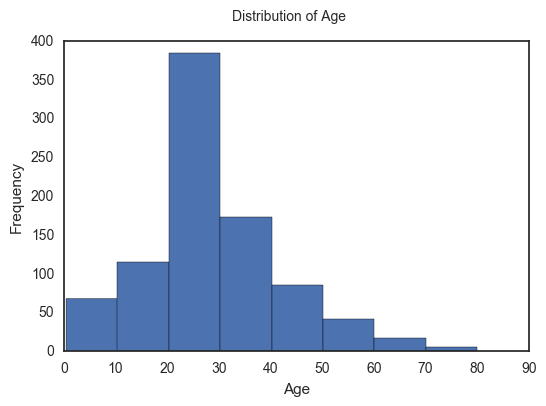

In [117]:
# Distribution of Age
#fig = plt.figure()
plt.style.use('seaborn-white')
titanic.Age.plot.hist(bins=8)
plt.suptitle('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.axis([0, 90, 0, 400])
plt.savefig('AgeDistribution.png')
plt.show()

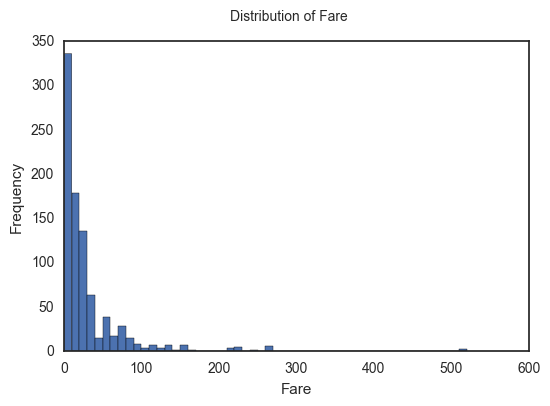

In [118]:
# Distribution of fare
plt.style.use('seaborn-white')
#fig = plt.figure()
binwidth = 10
bins = np.arange(min(titanic.Fare), max(titanic.Fare) + binwidth, binwidth)
plt.hist(titanic.Fare, bins=bins)
#titanic.Fare.hist(bins=bins)
plt.suptitle('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.savefig('FareDistribution.png')
plt.show()

In [119]:
titanic.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Age', u'SibSp',
       u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked_C', u'Embarked_Q',
       u'Embarked_S', u'Sex_female', u'Sex_male', u'Title_Master',
       u'Title_Miss', u'Title_Mr', u'Title_Mrs', u'Child'],
      dtype='object')

          Embarked_C  Embarked_Q  Embarked_S
Survived                                    
0               75.0        47.0       427.0
1               93.0        30.0       219.0


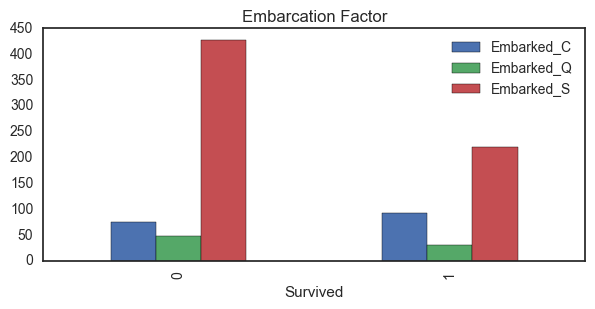

In [120]:
# Analysis with Group by survived
grouped_data = titanic.groupby('Survived')
df = grouped_data['Embarked_C','Embarked_Q','Embarked_S'].sum()
print df
plt.style.use('seaborn-white')
df.plot(kind='bar',figsize=(7,3),title='Embarcation Factor')
#fig = plt.figure()
#fig = plt.gcf()
plt.savefig('EmbarcationFactor.png')
plt.show()

          Sex_female  Sex_male
Survived                      
0               81.0     468.0
1              233.0     109.0


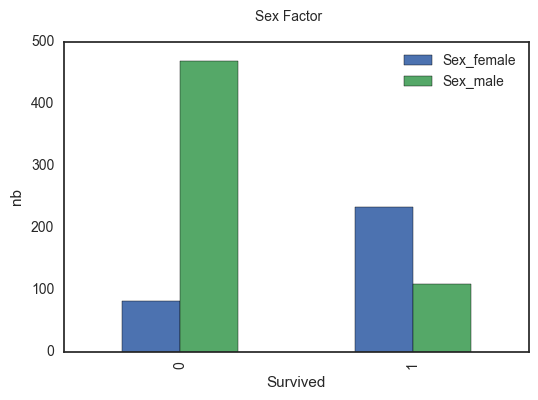

In [121]:
grouped_data = titanic.groupby('Survived')
df = grouped_data['Sex_female','Sex_male'].sum()
print df
plt.style.use('seaborn-white')
#fig = plt.figure()
df.plot(kind='bar')
plt.suptitle('Sex Factor')
plt.xlabel('Survived')
plt.ylabel('nb')
plt.savefig('SexFactor.png')
plt.show()

          Title_Master  Title_Miss  Title_Mr  Title_Mrs
Survived                                               
0                 17.0        54.0     447.0       31.0
1                 23.0       128.0      84.0      107.0


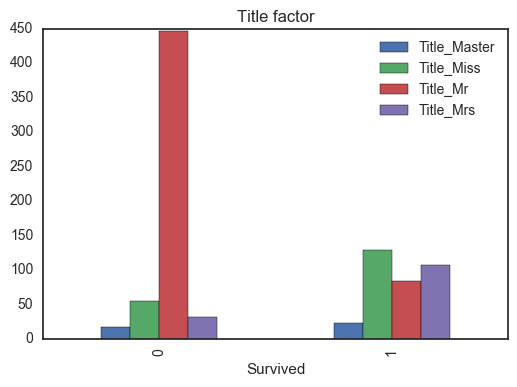

In [122]:
df = grouped_data['Title_Master','Title_Miss','Title_Mr','Title_Mrs'].sum()
print df
df.plot(kind='bar',title='Title factor')
plt.savefig('TitleFactor.png')
plt.show()

Survived
0    54.0
1    63.0
Name: Child, dtype: float64


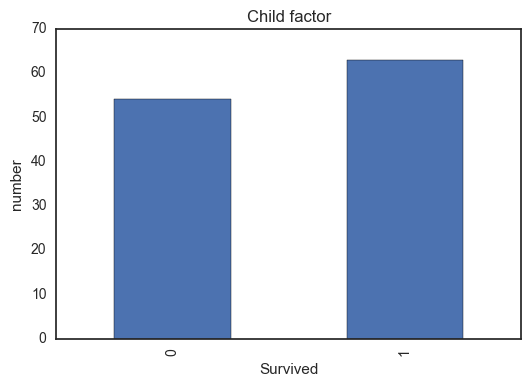

In [123]:
df = grouped_data['Child'].sum()
print df
df.plot(kind='bar',title='Child factor')
plt.ylabel('number')
plt.savefig('ChildrenFactor.png')
plt.show()

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


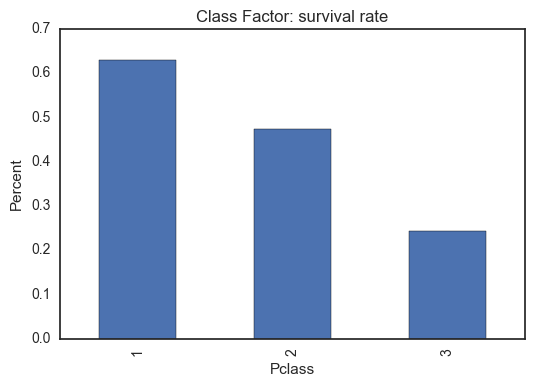

In [124]:
#Two step query to find sum of survived people, grouped by their passenger class (1 > 2 > 3)
group_pclass = titanic.groupby(['Pclass'])
#print group_survived.groups
print group_pclass.Survived.count()
df = group_pclass['Survived'].mean()

#plt.title('Class Factor: survival rate', y=1.05, size=15)
print df
plt.style.use('seaborn-white')
#fig = plt.figure()
df.plot(kind='bar',title='Class Factor: survival rate')
plt.ylabel('Percent')
plt.savefig('ClassFactor.png')
plt.show()

## 6. Relation between features

In [125]:
# Drop unused variables
# PassengerId is useless since it is redundant with titanic.index
titanic = titanic.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
print titanic.columns

Index([u'Survived', u'Pclass', u'Age', u'SibSp', u'Parch', u'Fare',
       u'Embarked_C', u'Embarked_Q', u'Embarked_S', u'Sex_female', u'Sex_male',
       u'Title_Master', u'Title_Miss', u'Title_Mr', u'Title_Mrs', u'Child'],
      dtype='object')


In [126]:
corr = titanic.corr()
print corr

              Survived    Pclass       Age     SibSp     Parch      Fare  \
Survived      1.000000 -0.338481 -0.078113 -0.035322  0.081629  0.257307   
Pclass       -0.338481  1.000000 -0.352775  0.083081  0.018443 -0.549500   
Age          -0.078113 -0.352775  1.000000 -0.265362 -0.187818  0.097881   
SibSp        -0.035322  0.083081 -0.265362  1.000000  0.414838  0.159651   
Parch         0.081629  0.018443 -0.187818  0.414838  1.000000  0.216225   
Fare          0.257307 -0.549500  0.097881  0.159651  0.216225  1.000000   
Embarked_C    0.168240 -0.243292  0.039104 -0.059528 -0.011069  0.269335   
Embarked_Q    0.003650  0.221009 -0.062583 -0.026354 -0.081228 -0.117216   
Embarked_S   -0.149683  0.074053  0.005127  0.068734  0.060814 -0.162184   
Sex_female    0.543351 -0.131900 -0.104189  0.114631  0.245489  0.182333   
Sex_male     -0.543351  0.131900  0.104189 -0.114631 -0.245489 -0.182333   
Title_Master  0.085221  0.082081 -0.407697  0.349559  0.267344  0.010908   
Title_Miss  

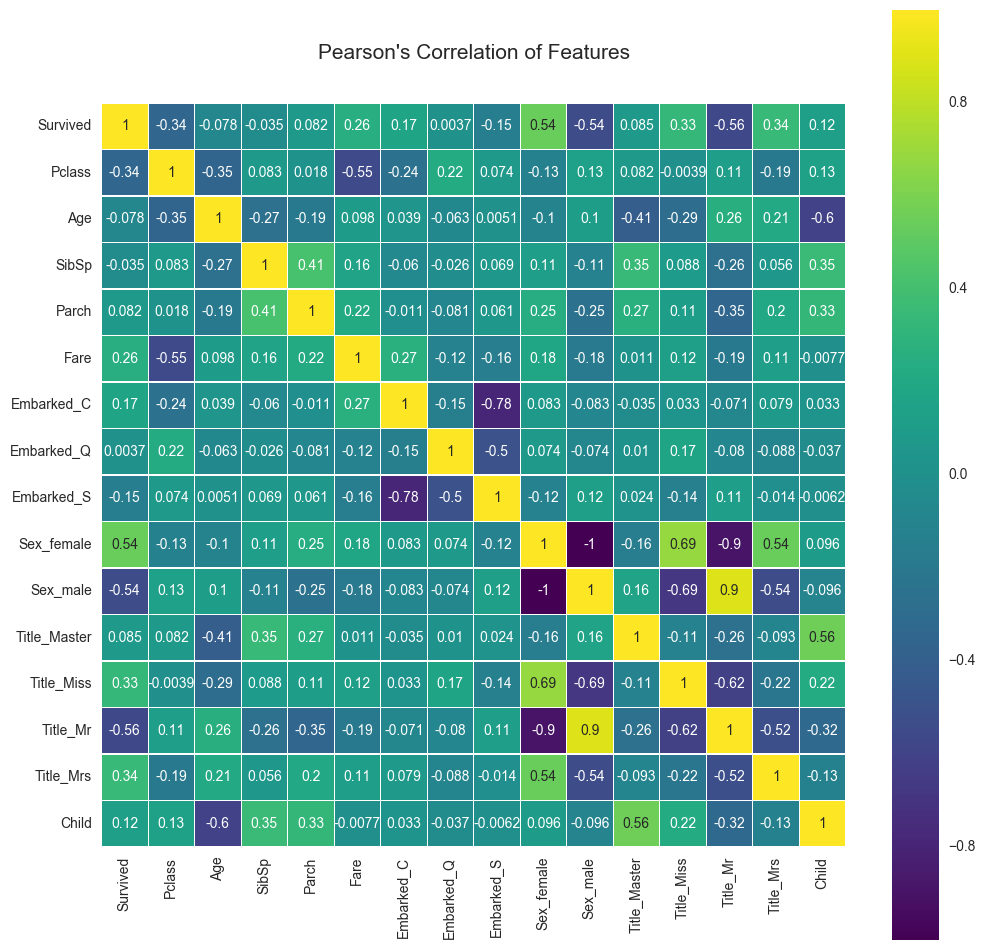

In [127]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title("Pearson's Correlation of Features", y=1.05, size=15)
sns.heatmap(titanic.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.savefig('PearsonCorrelationOfFeatures.png')
plt.show()

Pclass and Fare are linked

Master and Age are inversely linked

SibSp and Parch are linked

## Additional analysis

In [133]:
titanic.skew()

Survived        0.478523
Pclass         -0.630548
Age             0.438220
SibSp           3.695352
Parch           2.749117
Fare            4.787317
Embarked_C      1.595149
Embarked_Q      2.948778
Embarked_S     -1.009665
Sex_female      0.618921
Sex_male       -0.618921
Title_Master    4.403096
Title_Miss      1.469548
Title_Mr       -0.391769
Title_Mrs       1.911042
Child           2.186926
dtype: float64

In [130]:
titanic.median()

Survived         0.0000
Pclass           3.0000
Age             30.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
Embarked_C       0.0000
Embarked_Q       0.0000
Embarked_S       1.0000
Sex_female       0.0000
Sex_male         1.0000
Title_Master     0.0000
Title_Miss       0.0000
Title_Mr         1.0000
Title_Mrs        0.0000
Child            0.0000
dtype: float64

In [131]:
titanic.mode()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Child
0,0,3,30.0,0,0,8.05,0,0,1,0,1,0,0,1,0,0.0
